1/27/2018

# Noordin Top analysis

## Summary
This notebook sets-up the Noordin dataset (where edges can be defined in different ways such as educational colleagues, communication ties, kinship ties, business & finance affiliation, etc.) -- and the aim is to predict the "Noordin's Network" binary attribute -- as described here: https://www.dropbox.com/s/knq19mjbnu4wxnh/Noordin%20Subset%20Codebook.pdf?dl=0

Predicting: "8) Noordin’s Network: An individual is considered a member of Noordin’s splinter group (Tanzim Qaedat al-Jihad – Organization for the Basis of Jihad), as opposed to simply being linked, if the individual knowingly participated in a Noordin-led operation during any stage, he or she is explicitly stated as a member of Noordin’s inner circle, and/or he or she is tied to Noordin through kinship or friendship. 0. Non-member 1. Member"

Code organization assumes working directory is notebook folder location.

In [1]:
## implemented LINK with solver='lbfgs'
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages
import os
import openpyxl as px

## relevant libraries
execfile('../functions/python_libraries.py')

## data file paths
execfile('../functions/define_paths.py')

## processing datasets
execfile('../functions/create_adjacency_matrix.py') 
execfile('../functions/create_directed_adjacency_matrix.py')
execfile('../functions/compute_homophily.py')
execfile('../functions/compute_homophily_p_value.py')
execfile('../functions/compute_monophily.py')
execfile('../functions/compute_chi_square.py')
execfile('../functions/parsing.py')
execfile('../functions/mixing.py')

## code for gender prediction 
execfile('../functions/LINK.py')
execfile('../functions/majority_vote.py')
execfile('../functions/benchmark_classifier.py')
execfile('../functions/ZGL.py')
execfile('../functions/SI_functions/majority_vote_modified_SI.py')

## gender preference distribution
execfile('../functions/compute_null_distribution.py')

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/kristen/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/kristen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import platform
print platform.python_version()
print np.__version__

2.7.12
1.13.3


# The Noordin Top Terrorist Network
* set-up Noordin member prediction with different link types for relationships such as classmates, business affiliation, communication, etc.
* dataset obtained: https://sites.google.com/site/sfeverton18/research/appendix-1

### communication network

In [3]:
edge_type = '3 Communications'
communication_nw_tmp = pd.read_excel(noordin_file_path + 'Noordin Subset.xlsx', 
                                     sheetname = edge_type)

In [4]:
np.shape(communication_nw_tmp)

(79, 79)

In [5]:
noordin_communication_nw = nx.from_numpy_matrix(np.matrix(communication_nw_tmp))

In [6]:
## import noordin member attribute
attribute_df = pd.read_excel(noordin_file_path +'Noordin Subset.xlsx', 
                            sheetname ='13 Attributes' )


### rename node IDs with person name

In [7]:
remap_nodes = create_dict(range(len(np.array(communication_nw_tmp.index))),
                          np.array(communication_nw_tmp.index))
H=nx.relabel_nodes(noordin_communication_nw,remap_nodes)

In [8]:
## spot-check the node ordering
names_in_H = []
for j in range(len(H.nodes())):
    names_in_H.append( H.nodes(data = True)[j][0])
    

### add attribute value for individual name and indicator for whether member of Noordin's network

In [9]:
#from collections import OrderedDict
def create_dict(key, obj):
    return(dict([(key[i], obj[i]) for i in range(len(key)) ]))

In [10]:
node_noordin = create_dict(np.array(attribute_df['Noordin\'s Network'].index),
                           np.array(attribute_df['Noordin\'s Network']))
print ''
## verify list of Noordin Top members
print np.sort(np.array(node_noordin.keys())[np.array(node_noordin.values())==1])


[u'Abu Dujanah' u'Abu Fida' u'Achmad Hasan' u'Adung' u'Agus Ahmad'
 u'Ahmad Rofiq Ridho' u'Ali Ghufron' u'Anif Solchanudin' u'Apuy'
 u'Asmar Latin Sani' u'Azhari Husin' u'Baharudin Soleh' u'Chandra'
 u'Cholily' u'Dani Chandra' u'Enceng Kurnia' u'Hambali' u'Hari Kuncoro'
 u'Heri Golun' u'Heri Sigu Samboja' u'Imam Bukhori' u'Iqbal Huseini'
 u'Irun Hidayat' u'Ismail' u'Iwan Dharmawan' u'Jabir' u'Joko Triharmanto'
 u'Joni Achmad Fauzan' u'Misno' u'Mohamed Ihsan' u'Mohamed Rais'
 u'Munfiatun' u'Noordin Mohammed Top' u'Purnama Putra' u'Qotadah'
 u'Salik Firdaus' u'Sardona Siliwangi' u'Son Hadi' u'Subur Sugiarto'
 u'Suramto' u'Tohir' u'Toni Togar' u'Ubeid' u'Umar' u'Umar Patek' u'Urwah'
 u'Usman bin Sef']


In [11]:
(noordin, adj)=create_adj_membership(graph=H, 
                              dictionary=node_noordin,  
                              val_to_drop=999,
                              delete_na_cols='yes', 
                              diagonal=0, 
                              directed_type=None, 
                              attribute='noordin')

In [12]:
adj_amherst2= np.matrix(adj)**2
adj_amherst2[range(adj_amherst2.shape[0]),range(adj_amherst2.shape[0])]=0 ## remove self-loops

# %same@khop Plot
for k=1,2,...,5

In [13]:
class_values = np.sort(np.unique(noordin))
k_hop = np.array([1,2,3,4,5])


In [14]:
prop_same_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[noordin==class_values[0],:] * np.matrix((noordin==class_values[0])+0).T)/np.sum(adj_amherst_k[noordin==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[noordin==class_values[1],:] * np.matrix((noordin==class_values[1])+0).T)/np.sum(adj_amherst_k[noordin==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(noordin==class_values[0]),
                                                                       np.array(mv_g2).T[0]>np.mean(noordin==class_values[1]))))
    prop_same_array.append( proportion_majority_same)



1
2
3
4
5


In [15]:
prop_same_array

[0.89189189189189189,
 0.7567567567567568,
 0.67567567567567566,
 0.66216216216216217,
 0.63513513513513509]

In [16]:
auc_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[noordin==class_values[0],:] * np.matrix((noordin==class_values[0])+0).T)/np.sum(adj_amherst_k[noordin==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[noordin==class_values[1],:] * np.matrix((noordin==class_values[1])+0).T)/np.sum(adj_amherst_k[noordin==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(noordin==class_values[0]),
                                                                       np.array(mv_g2).T[0]>np.mean(noordin==class_values[1]))))

    y_score = np.array(np.concatenate((1-mv_g1,mv_g2))).T[0]
    y_test = np.concatenate((np.repeat(class_values[0],len(mv_g1)),
                                             np.repeat(class_values[1],len(mv_g2))))

    auc_score = sklearn.metrics.roc_auc_score(label_binarize(y_test, np.unique(y_test)),
                                    y_score)
    auc_array.append(auc_score)

1
2
3
4
5


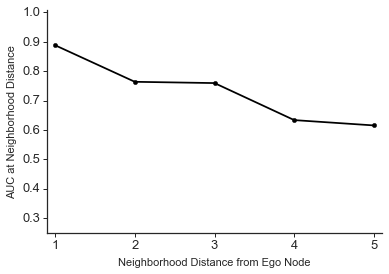

In [17]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([1,2,3,4,5]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        grid[i].plot(k_hop,
           auc_array, color = 'black')
        grid[i].scatter(k_hop,
           auc_array, color = 'black')

        grid[i].set_xlim(0.9,5.1)
        grid[i].set_ylim(0.25,1.01)

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Neighborhood Distance from Ego Node')
        grid[i].set_ylabel('AUC at Neighborhood Distance')

grid[0].set_xticks([1,2,3,4,5])
grid[0].set_yticks([ 0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
pp = PdfPages('../../figures/khop_vs_raw_AUC_noordin_NHB_figure_python.pdf')
pp.savefig()
pp.close()
plt.show()


## baseline homophily 
ie relative class proportions

In [18]:
print np.mean(noordin==0)
print np.mean(noordin==1)

0.364864864865
0.635135135135


In [19]:
print np.sum(noordin==0)
print np.sum(noordin==1)

27
47


## homophily index for: non-member ( == 0) and member ( == 1)

In [20]:
print np.mean(noordin==0)
print np.sum(noordin==0)
print np.mean(noordin==1)
print np.sum(noordin==1)
print ''
h = homophily_index_Jackson_alternative(adj,
                                   noordin)
print h

0.364864864865
27
0.635135135135
47

[0.54545454545454553, 0.89164086687306499]


#### homophily p-values

In [21]:
## quick spot-check
print np.exp(homophily_intercept(adj,
                         noordin)[0])/(1+np.exp(homophily_intercept(adj,
                         noordin)[0]))
print np.exp(homophily_intercept(adj,
                         noordin)[1])/(1+np.exp(homophily_intercept(adj,
                         noordin)[1]))

[ 0.54545455]
[ 0.89164087]


In [22]:
print homophily_intercept_p_value(adj,
                         noordin)

[[  4.25671393e-01]
 [  5.29993219e-32]]


## monophily index for: non-member ( == 0) and member ( == 1)

In [23]:
m = monophily_index_overdispersion_Williams(adj,
                                       noordin)
print m

[0.0, 0.016793862633199]


#### determine significance of overdispersion

In [24]:
## compute with p-values
print compute_chi_square_statistic(adj, noordin)

[0.78971561483681751, 0.30855879687957721]


In [25]:
print np.sum(noordin == 0)
print np.sum(noordin == 1)


27
47


In [26]:
deg_same_0 = adj[noordin ==0,:] * np.matrix(noordin==0).T
total_0 = np.sum(adj[noordin ==0,:],1)
deg_same_1 = adj[noordin ==1,:] * np.matrix(noordin==1).T
total_1 = np.sum(adj[noordin ==1,:],1)

In [27]:
n_iter = 100000
d_iF = map(np.int,np.array(total_0))

mc_F = []
for j in range(n_iter):
    mc_F.append( np.random.binomial(n=map(np.int,np.array(total_0)), p=h[0])/d_iF)
    
mc_F_final = np.array(mc_F).flatten()


d_iM = map(np.int,np.array(total_1))
mc_M = []
for j in range(n_iter):
    mc_M.append( np.random.binomial(n=map(np.int,np.array(total_1)), p=h[1])/d_iM)
    
mc_M_final = np.array(mc_M).flatten()

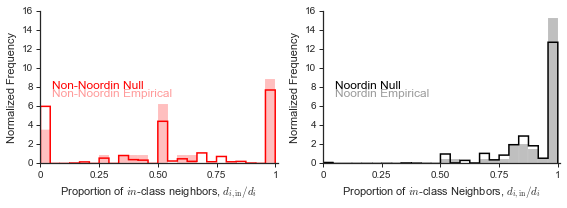

In [28]:
alpha_empirical = 0.4

%matplotlib inline
nbins = 25
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


ax1.hist(deg_same_0/total_0,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='red',alpha=0.25)

ax1.hist(mc_F_final,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'red',histtype='step',
        color='white',alpha=1,lw=1.5)

ax1.set_ylabel('Normalized Frequency')
ax1.set_xlabel('Proportion of $in$-class neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,16)

ax1.set_xlim(0,1.01)
#ax1.set_title('Non-Noordin')


ax2.set_ylim(0,16)
ax2.set_xlim(0,1.01)
plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax2.set_xticks([0,0.25, 0.5, 0.75, 1])
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


ax2.hist(deg_same_1/total_1,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='black',alpha=0.25)
ax2.hist(mc_M_final,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'black',histtype='step',
        color='white',alpha=1,lw=1.5)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax2.set_ylabel('Normalized Frequency')
#ax2.set_title('Noordin')


ax1.annotate('Non-Noordin Null', xy=(0.05,7.9), 
                 color='red', alpha=1, size=12)
ax1.annotate('Non-Noordin Empirical', xy=(0.05,7), 
                 color='red', alpha=alpha_empirical, size=12)
#ax1.annotate('\phi='+np.str(m[0]), xy=(0.05,6.5), 
#                 color='red', size=12)
ax2.annotate('Noordin Null', xy=(0.05,7.9), 
                 color='black', alpha=1, size=12)
ax2.annotate('Noordin Empirical', xy=(0.05,7), 
                 color='black', alpha=alpha_empirical, size=12)
#ax2.annotate('\phi='+np.str(m[1]), xy=(0.05,6.5), 
#                 color='black',  size=12)
plt.tight_layout()
pp = PdfPages( '../../figures/noordin_degree_same.pdf')
pp.savefig()
pp.close()

## prediction set-up

In [29]:
percent_initially_unlabelled = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [30]:
n_iter = 100

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import LeaveOneOut

In [32]:
(mean_accuracy_amherst, se_accuracy_amherst, 
 mean_micro_auc_amherst, se_micro_auc_amherst, 
 mean_wt_auc_amherst_lbfgs, se_wt_auc_amherst) = LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(noordin), ## gender labels 
                                                              adj,#np.matrix(adj), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    solver='lbfgs',
                                                                                                    C=1)
                                                                                                    ,num_iter=n_iter,
                                                                                                cv_setup= 'stratified')

0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [33]:
(mean_accuracy_mv_amherst, se_accuracy_mv_amherst, 
 mean_micro_auc_mv_amherst, se_micro_auc_mv_amherst, 
 mean_wt_auc_mv_amherst, se_wt_auc_mv_amherst) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(noordin), 
                                                                adj,#np.array(adj), 
                                                                       num_iter=n_iter,
                                                                      cv_setup= 'stratified')


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in true_divide


In [34]:
## SI figures
(mean_accuracy_mv_amherst_SI, se_accuracy_mv_amherst_SI, 
 mean_micro_auc_mv_amherst_SI, se_micro_auc_mv_amherst_SI, 
 mean_wt_auc_mv_amherst_SI, se_wt_auc_mv_amherst_SI,
 mean_accuracy_mv_amherstF_SI, se_accuracy_mv_amherstF_SI,
 mean_accuracy_mv_amherstM_SI, se_accuracy_mv_amherstM_SI) = majority_vote_modified_SI(percent_initially_unlabelled,  
                                                                np.array(noordin), 
                                                                adj, 
                                                                       num_iter=n_iter,
                                                                                    cv_setup='stratified')

0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in true_divide


In [35]:
(mean_accuracy_mv2_amherst2, se_accuracy_mv2_amherst2, 
 mean_micro_auc_mv2_amherst2,se_micro_auc_mv2_amherst2, 
 mean_wt_auc_mv2_amherst2,se_wt_auc_mv2_amherst2) =majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(noordin), 
                                                                np.array(adj_amherst2),#np.array(adj_amherst2), 
                                                                num_iter=n_iter,
                                                                           cv_setup= 'stratified')


0.9
0.8
0.7
0.6
0.5
0.4
0.3

/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in true_divide
/Users/kristen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



0.2
0.1


In [36]:
## SI figures
(mean_accuracy_mv2_amherst_SI, se_accuracy_mv2_amherst_SI, 
 mean_micro_auc_mv2_amherst_SI, se_micro_auc_mv2_amherst_SI, 
 mean_wt_auc_mv2_amherst_SI, se_wt_auc_mv2_amherst_SI,
 mean_accuracy_mv2_amherstF_SI, se_accuracy_mv2_amherstF_SI,
 mean_accuracy_mv2_amherstM_SI, se_accuracy_mv2_amherstM_SI) = majority_vote_modified_SI(percent_initially_unlabelled,  
                                                                np.array(noordin), 
                                                                np.array(adj_amherst2), 
                                                                       num_iter=n_iter,
                                                                cv_setup = 'stratified')



0.9
0.8
0.7
0.6
0.5
0.4
0.3

/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in true_divide
/Users/kristen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



0.2
0.1


In [37]:
(mean_wt_auc_baseline_amherst, se_wt_auc_baseline_amherst) = random_classifier(np.array(adj),
                                                                             np.array(noordin),
                                                                            percent_initially_unlabelled,
                                                                             num_iter=n_iter,
                                                                             cv_setup = 'stratified')

0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [38]:
(mean_accuracy_zgl_amherst, se_accuracy_zgl_amherst, 
mean_micro_auc_zgl_amherst, se_micro_auc_zgl_amherst, 
mean_wt_auc_zgl_amherst, se_wt_auc_zgl_amherst) = ZGL_finalized(np.array(adj),#np.array(adj),
                                    np.array(noordin),percent_initially_unlabelled, 
                                    num_iter=n_iter,
                                        cv_setup = 'stratified')

0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


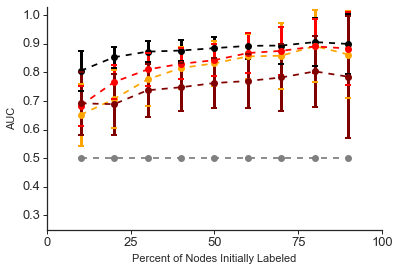

In [39]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_amherst_lbfgs,
            yerr=se_wt_auc_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_amherst,
            yerr=se_wt_auc_zgl_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_amherst,
            yerr=se_wt_auc_mv_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_amherst2, 
            yerr=se_wt_auc_mv2_amherst2, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_amherst, 
            yerr=se_wt_auc_baseline_amherst, fmt='--o', capthick=2,
           alpha=1, elinewidth=3, color='gray')
        
        
        grid[i].set_ylim(0.3,1.1)
        grid[i].set_xlim(0,101)
        #grid[i].annotate('LINK', xy=(3, 0.99), 
        #         color='black', alpha=1, size=12)
        #grid[i].annotate('2-hop MV', xy=(3, 0.96), 
        #         color='maroon', alpha=1, size=12)
        #grid[i].annotate('1-hop MV', xy=(3, 0.93), 
        #         color='red', alpha=1, size=12)
        #grid[i].annotate('ZGL', xy=(3, 0.9), 
        #         color='orange', alpha=1, size=12)
        #grid[i].annotate('Baseline', xy=(3, 0.87), 
        #         color='gray', alpha=1, size=12)
        grid[i].set_ylim(0.25,1.03)
        grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled')
        grid[i].set_ylabel('AUC')

#plt.setp(ax1, xticks=[0,25, 50, 75, 100], xticklabels=['0', '25', '50', '75', '100'])
grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
#plt.show()
pp = PdfPages('../../figures/noordin_2hop_vs_1hop.pdf')

pp.savefig()
pp.close()

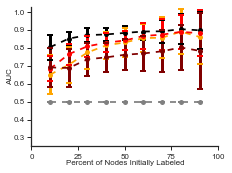

In [40]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure(figsize=(6.69291/2,2.5), dpi = 300)
text_size = 8
axis_text = 8
tick_label_size = 7
msize = 5
pad = 0#.1
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_amherst_lbfgs,
            yerr=se_wt_auc_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_amherst,
            yerr=se_wt_auc_zgl_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_amherst,
            yerr=se_wt_auc_mv_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_amherst2, 
            yerr=se_wt_auc_mv2_amherst2, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_amherst, 
            yerr=se_wt_auc_baseline_amherst, fmt='--o', capthick=2,
           alpha=1, elinewidth=3, color='gray', markersize = msize)
        
        
        grid[i].set_ylim(0.3,1.05)
        grid[i].set_xlim(0,102)
        grid[i].set_ylim(0.25,1.03)
        grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=axis_text,
                           length = 0.1,
                           width = 0.5)
        grid[i].tick_params(axis='both', which='minor', labelsize=axis_text)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled', size = axis_text,labelpad = pad)
        grid[i].set_ylabel('AUC', size = axis_text,labelpad = pad)
grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1])
grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)#plt.show()
pp = PdfPages('../../figures/noordin_2hop_vs_1hop_NHB.pdf')

pp.savefig(dpi=300)
pp.close()

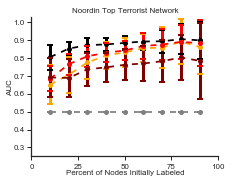

In [41]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure(figsize=(6.69291/2,2.5), dpi = 300)
text_size = 8
axis_text = 8
tick_label_size = 7
msize = 5
pad = 0#.1
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_amherst_lbfgs,
            yerr=se_wt_auc_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_amherst,
            yerr=se_wt_auc_zgl_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_amherst,
            yerr=se_wt_auc_mv_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_amherst2, 
            yerr=se_wt_auc_mv2_amherst2, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon', markersize = msize)
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_amherst, 
            yerr=se_wt_auc_baseline_amherst, fmt='--o', capthick=2,
           alpha=1, elinewidth=3, color='gray', markersize = msize)
        
        
        grid[i].set_ylim(0.3,1.05)
        grid[i].set_xlim(0,102)
        grid[i].set_ylim(0.25,1.03)
        grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=axis_text,
                           length = 0.1,
                           width = 0.5)
        grid[i].tick_params(axis='both', which='minor', labelsize=axis_text)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled', size = axis_text,labelpad = pad)
        grid[i].set_ylabel('AUC', size = axis_text,labelpad = pad)
grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1])
grid[0].minorticks_on()
grid[0].set_title('Noordin Top Terrorist Network', size = text_size)
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)#plt.show()
pp = PdfPages('../../figures/noordin_2hop_vs_1hop_NHB_title.pdf')

pp.savefig(dpi=300)
pp.close()